In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Parametrização 5 dim
num_particles = 130
num_dimensions = 5 
num_iterations = 100
lim_inf = -5.12
lim_sup = 5.12
seed = 79

w  = 0.5 # Coeficiente de inércia
c1 = 1.2 # Coeficiente cognitivo
c2 = 1.6 # Coeficiente social

In [3]:
#Parametrização 4 dim

num_particles = 130
num_dimensions = 4
num_iterations = 100
lim_inf = -5.12
lim_sup = 5.12
seed=81

w  = 0.672 # Coeficiente de inércia
c1 = 1.4  # Coeficiente cognitivo
c2 = 1.6  # Coeficiente social

In [4]:
#numero de experimento
qtd_exp = 20

In [5]:
def rastrigin(x):
    
    d = len(x)
    fx = 10 * d + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))
    return fx

In [6]:
def objective_function(x):
    r = 12
    s = 15
    
    fx = rastrigin(x) 

    gx = np.sum(r * np.maximum(0, np.sin(2 * np.pi * x) + 0.5))   # gi(x) desigualdade
    hx = np.sum(s * np.abs(np.cos(2 * np.pi * x) + 0.5))        # hi(x0) igualdade

    px = fx + gx + hx                              
    
    return px

In [7]:
vector_exp_fitness = []
for exp in range(qtd_exp):
    vector_best_fitness = []
    vector_best_position = []
    vector_best_distance = []
    #start_time = time()
    #np.random.seed(seed)

    particles_position = np.random.uniform(low=lim_inf, high=lim_sup, size=(num_particles, num_dimensions))
    particles_velocity = np.random.uniform(size=(num_particles, num_dimensions))

    personal_best_positions = particles_position.copy()
    personal_best_fitness = [objective_function(p) for p in particles_position]

    global_best_index = np.argmin(personal_best_fitness)
    global_best_position = particles_position[global_best_index].copy()
    global_best_fitness = objective_function(global_best_position)

    #vetores para analise do experimento
    vector_best_fitness.append(global_best_fitness)
    vector_best_position.append(global_best_position)

    for it in range(num_iterations):
        progress = (it * 100) / num_iterations
        print(f'\r Iteração {it + 1}. Concluído {progress:.2f}% ', end='', flush=True)

        for i in range(num_particles):

            inertia_vector = w*particles_velocity[i]
            local_vector = c1*(personal_best_positions[i] - particles_position[i])
            global_vector = c2*(global_best_position - particles_position[i])

            particles_velocity[i] = inertia_vector + local_vector + global_vector

            particles_position[i] += particles_velocity[i]

            current_fitness = objective_function(particles_position[i])

            if current_fitness < personal_best_fitness[i]:
                personal_best_fitness[i] = current_fitness
                personal_best_positions[i] = particles_position[i].copy()

                if current_fitness < global_best_fitness:
                    global_best_fitness = current_fitness
                    global_best_position = particles_position[i].copy()
            
        vector_best_fitness.append(global_best_fitness)
        vector_best_position.append(global_best_position)
        
    vector_exp_fitness.append(vector_best_fitness)
   # end_time = time()

 Iteração 1. Concluído 0.00% 

 Iteração 100. Concluído 99.00% 

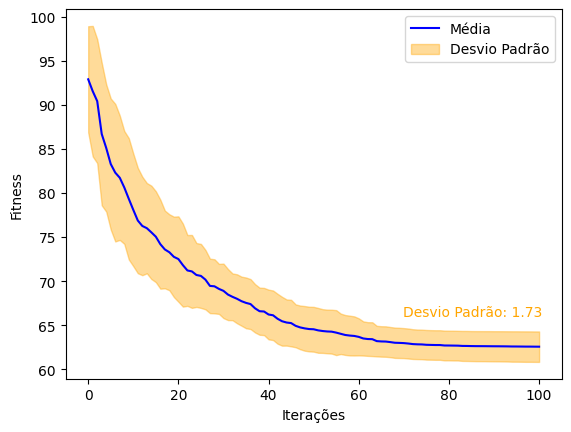

In [8]:
media = np.mean(vector_exp_fitness, axis=0)
desvio_padrao = np.std(vector_exp_fitness, axis=0)

indices = np.arange(1, len(media) + 1)

x = np.arange(len(media))  
plt.plot(x, media, label='Média', color='blue')
plt.fill_between(x, media - desvio_padrao, media + desvio_padrao, alpha=0.4, color='orange', label='Desvio Padrão')

texto_desvio_padrao = f'Desvio Padrão: {desvio_padrao[-1]:.2f}'
plt.text(0.68, 0.2, texto_desvio_padrao, transform=plt.gca().transAxes, color='orange', fontsize=10, verticalalignment='top')

# Adicione a seguinte linha para plotar o valor de vector_best_distance no eixo y
#plt.axhline(y=vector_best_distance[-1], color='red', linestyle='--', label='Melhor Distância')

plt.xlabel('Iterações')
plt.ylabel('Fitness')

plt.legend()

plt.show()


In [9]:
vector_best_position[-1]

array([ 0.66669186,  0.66674589, -0.33335427,  0.66667732])